# **Udemy - Paid or Free?**

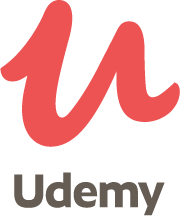

It is rightly said by 'Benjamin Franklin' that 'An investment in knowledge pays the best interest'. This notebook comprises of an educational platform known as udemy that aimes at educating professional adults and students. It was developed in May 2010 and ever since it has successfully provided numerous courses belonging to various subjects. Udemy has not only catered to its english speaking students but also embraced over 65 languages so that language would not be a barrier for all the enthusiastic students world wide. In this notebook we look closely at the various courses that are offered by Udemy, the popularity of certain courses/subject as well as the factors that influence the price of these courses.

Kindly provide an upvote if this notebook was useful. Also I would greatly appreciate any feedback or suggeston for improvement. Thank-you :)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


# **Data Loading**

In [2]:
train = pd.read_csv('../input/udemy-courses/udemy_courses.csv')
train.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
row = train.shape[0]
col = train.shape[1]
print("The number of rows within the dataset are {} and the number of columns are {}".format(row,col))

The number of rows within the dataset are 3678 and the number of columns are 12


# **Data Cleaning**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In our dataset we have features of type: Boolean(1), Float(1), Integer(5) and Object/String(5). Thus we have a total of 12 features.

In [5]:
train.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Since all the values of each feature are present we do not need to deal with missing values.

In [6]:
dates = []
for i in train['published_timestamp']:
    datess=dt.datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ')
    dates.append(datess)

train['time'] = dates
train['year'] = train['time'].dt.year
train.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,time,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19 19:26:30,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30 20:07:24,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13 14:57:18,2016


In [7]:
train.drop('published_timestamp',axis=1,inplace=True)

# **Data Analysis**

In [8]:

Free = train[train['is_paid'] == 0]
Free.shape


(310, 13)

In [9]:
Paid = train[train['is_paid'] == 1]
Paid.shape

(3368, 13)

In [10]:
columns = train['subject'].unique()
columns

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

* What are the best free and paid courses by subject?

In [11]:
for x in columns:
    maxr = Free[Free['subject'] == x]['num_subscribers'].max()
    course = Free[(Free['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("The best free course offered by udemy for {} is \n{} with {} subscribers\n".format(x,course[0],maxr))

for x in columns:
    maxr = Paid[Paid['subject'] == x]['num_subscribers'].max()
    course = Paid[(Paid['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("The best paid course offered by udemy for {} is \n{} with {} subscribers\n".format(x,course[0],maxr))


-----------------------------------------------------------------------------------
The best free course offered by udemy for Business Finance is 
Bitcoin or How I Learned to Stop Worrying and Love Crypto with 65576 subscribers

-----------------------------------------------------------------------------------
The best free course offered by udemy for Graphic Design is 
Photoshop In-Depth: Master all of Photoshop's Tools Easily with 53851 subscribers

-----------------------------------------------------------------------------------
The best free course offered by udemy for Musical Instruments is 
Free Beginner Electric Guitar Lessons with 101154 subscribers

-----------------------------------------------------------------------------------
The best free course offered by udemy for Web Development is 
Learn HTML5 Programming From Scratch with 268923 subscribers

-----------------------------------------------------------------------------------
The best paid course offered by udemy 

* What are the most popular courses?

In [12]:

print("The top 5 most popular courses with respect to subcribers are:\n")
popular = train.sort_values(['num_subscribers'],ascending=False).head()['course_title'].unique()
i = 0
while i<len(popular):
    print(popular[i])
    i = i+1

The top 5 most popular courses with respect to subcribers are:

Learn HTML5 Programming From Scratch
Coding for Entrepreneurs Basic
The Web Developer Bootcamp
Build Your First Website in 1 Week with HTML5 and CSS3
The Complete Web Developer Course 2.0


* What are the most engaging courses?

In [13]:
train['engagment']  = train['num_subscribers'] * train['num_reviews']
print("The top 5 most engaging courses with respect to subcribers and reviews are are:\n")
engaging = train.sort_values(['engagment'],ascending=False).head()['course_title'].unique()
i = 0
while i<len(engaging):
    print(engaging[i])
    i = i+1

The top 5 most engaging courses with respect to subcribers and reviews are are:

The Web Developer Bootcamp
The Complete Web Developer Course 2.0
Learn HTML5 Programming From Scratch
Angular 4 (formerly Angular 2) - The Complete Guide
JavaScript: Understanding the Weird Parts


* Which courses offer the best cost benefit?

In [14]:
priceprefect = train[(train['price']<=train['price'].mean()) & (train['engagment']>=train['engagment'].mean())].sort_values(('engagment'),ascending=False)['course_title'].head(1).unique()[0]
print("The best course that offers cost benefit is",priceprefect)

The best course that offers cost benefit is Learn HTML5 Programming From Scratch


* Which were the most popular courses according to the year they were published?

In [15]:
years = train['year'].unique()

for x in years:
    maxr = train[train['year'] == x]['num_subscribers'].max()
    course = train[(train['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("The best course offered by udemy in {} was \n{} with {} subscribers\n".format(x,course[0],maxr))
    

-----------------------------------------------------------------------------------
The best course offered by udemy in 2017 was 
The Ultimate Drawing Course - Beginner to Advanced with 26742 subscribers

-----------------------------------------------------------------------------------
The best course offered by udemy in 2016 was 
The Complete Web Developer Course 2.0 with 114512 subscribers

-----------------------------------------------------------------------------------
The best course offered by udemy in 2014 was 
Build Your First Website in 1 Week with HTML5 and CSS3 with 120291 subscribers

-----------------------------------------------------------------------------------
The best course offered by udemy in 2015 was 
The Web Developer Bootcamp with 121584 subscribers

-----------------------------------------------------------------------------------
The best course offered by udemy in 2013 was 
Learn HTML5 Programming From Scratch with 268923 subscribers

------------------

# **Data Visualization**

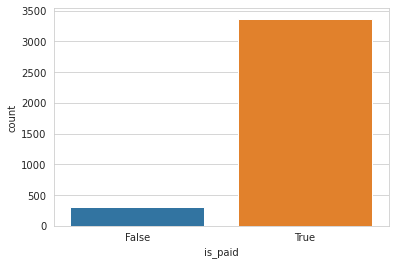

In [16]:
sns.countplot('is_paid',data=train)

The number of paid courses are comparatively more than that of the free courses 

**Relationship between Subject, Level and Price**

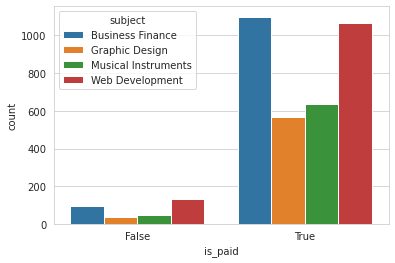

In [17]:
sns.countplot('is_paid',hue='subject',data=train)

A variety of free courses are available for the topic of 'Web Development'. 
Likewise for paid courses there are a variety of course based on 'Business Finance'

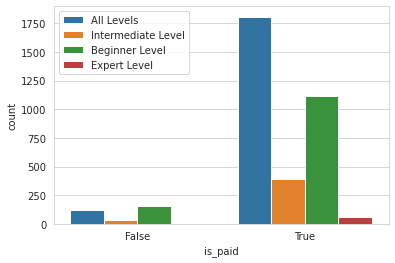

In [18]:
sns.countplot('is_paid',hue='level',data=train)
plt.legend(loc='upper left')

All types of courses are available for paid courses, whereas there are no expert level courses available for free.

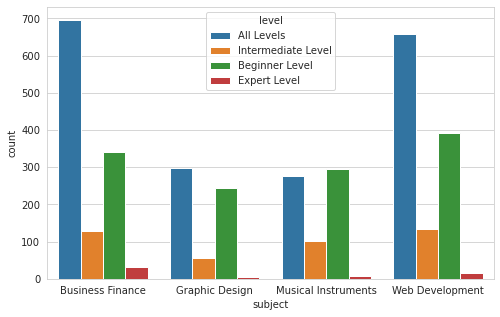

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('subject',hue='level',data=train)

Each subject have all levels of courses. However there are certain subjects that provide majority courses of a certain level. 
Business Finance, Graphic Design and Web Development offer many courses that consists of all the levels.
Musical Instruments offers a major amount of Beginner level courses.
All the subjects have very few expert level courses. 

Text(0.5, 1.0, 'Price range and its frequency')

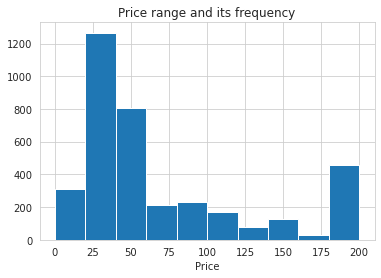

In [20]:
train.price.hist(bins=10)
plt.xlabel("Price")
plt.title("Price range and its frequency")

The most purchased courses cost 25$

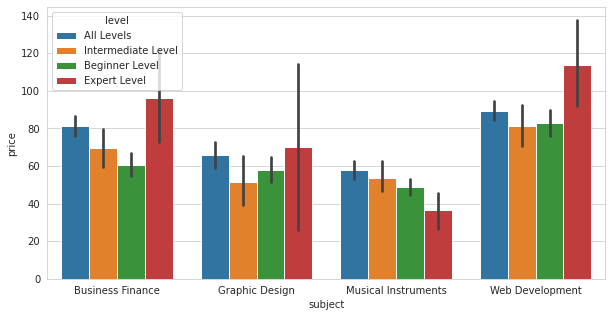

In [21]:
plt.figure(figsize=(10,5))
sns.barplot('subject','price',hue='level',data=Paid)

By comparing all the graphs we notice that the expert level of many subjects costs quite a lot than any other levels of each subject. Thus we can say that this could probably be a factor so as to why many users have not purchased the expert level courses. On the other hand the cost of the courses that serve to all levels and beginner level are very reasonable and popular among users .  

**Relationship between Number of Subscribers, Number of Reviews, Subject and Level**

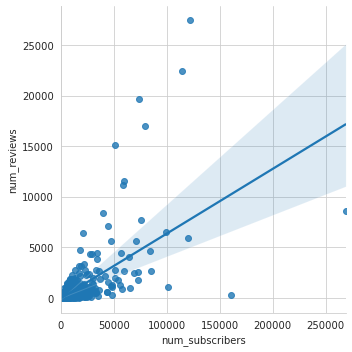

In [22]:
sns.lmplot('num_subscribers','num_reviews',data=train)

There is a positive/direct relationship between the number of subscribers and reviews. If we look closely we realise that there are certain outliers within the graph. It is always advisable to deal with these outliers before we train a model for prediction.

In [23]:
table1 = pd.pivot_table(train, values=['num_subscribers','num_reviews'], index=['is_paid'],aggfunc=np.sum)
table1

,num_reviews,num_subscribers
is_paid,,
False,132038,3575525
True,442683,8183595


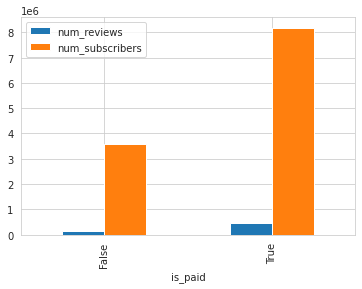

In [24]:
table1.plot(kind='bar')

We create a pivot table to calculate the total number of subcribers and review present in the free as well as paid courses. We observe that there are more number of subcribers and reviews for paid courses.

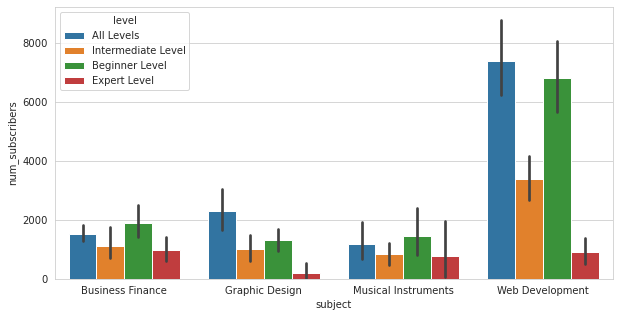

In [25]:
plt.figure(figsize=(10,5))
sns.barplot('subject','num_subscribers',hue='level',data=train)

All the courses and levels belonging to Web Development have a many subcribers. This is then followed by the Graphic Design that offers all levels and then by the beginner level of the Business Finance.  

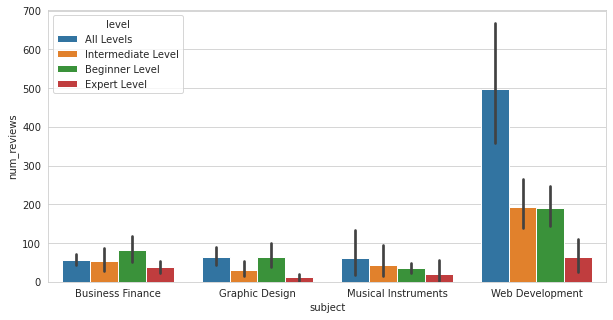

In [26]:
plt.figure(figsize=(10,5))
sns.barplot('subject','num_reviews',hue='level',data=train)

The most reviews were posted for the course of Web Development.

**Relationship between Number of Lectures, Content Duration, Subject and Level**

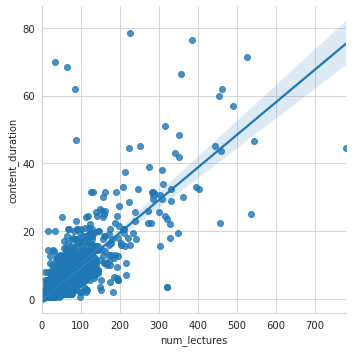

In [27]:
sns.lmplot('num_lectures','content_duration',data=train)

There is a positive/direct relationship between the number of subscribers and reviews. If we look closely with every increase in the number of lectures there is a positive increase in the content duration. However there also exist an amount of outliers.

In [28]:
table2 = pd.pivot_table(train, values=['num_lectures','content_duration'], index=['is_paid'],aggfunc=np.sum)
table2

,content_duration,num_lectures
is_paid,,
False,685.333333,6639
True,14374.300000,140881


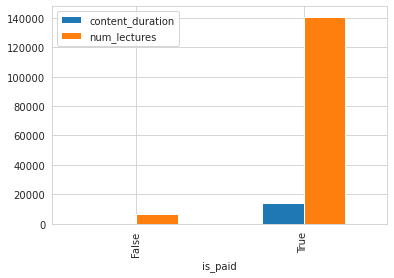

In [29]:
table2.plot(kind='bar')

We create a pivot table to calculate the total length of the lectures and the number of lectures present in the free as well as paid courses. We observe that there are more number of lectures for paid courses.

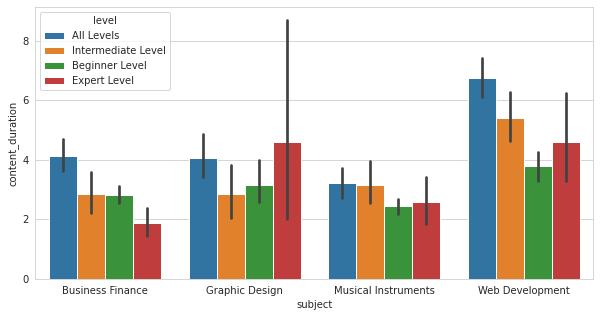

In [30]:
plt.figure(figsize=(10,5))
sns.barplot('subject','content_duration',hue='level',data=train)

The most content were posted for the course of Web Development. We also observe that there is a very high error rate present in the expert level of the Graphic Design subject.

**Relationship between Year of post, Subject and Number of Subcribers**

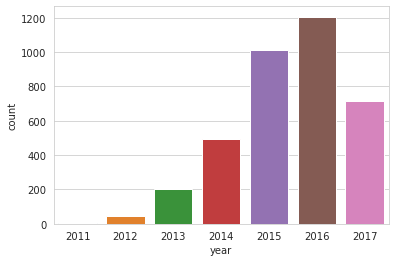

In [31]:
sns.countplot('year',data=train)

In the year 2016 there were the most courses that were posted on udemy. 

In [32]:
table3 = pd.pivot_table(train, values=['num_subscribers'], index=['year'],columns=['subject'],aggfunc=np.sum)
table3

num_subscribers                                                   
subject Business Finance Graphic Design Musical Instruments Web Development
year                                                                       
2011                 NaN            NaN                 NaN        119028.0
2012              3620.0       100649.0            133635.0        317435.0
2013            311664.0        50133.0            150224.0       1211417.0
2014            494623.0       174582.0            156152.0       1105049.0
2015            501858.0       352856.0            190368.0       2430242.0
2016            426647.0       229587.0            148748.0       2161662.0
2017            130299.0       155341.0             67562.0        635739.0

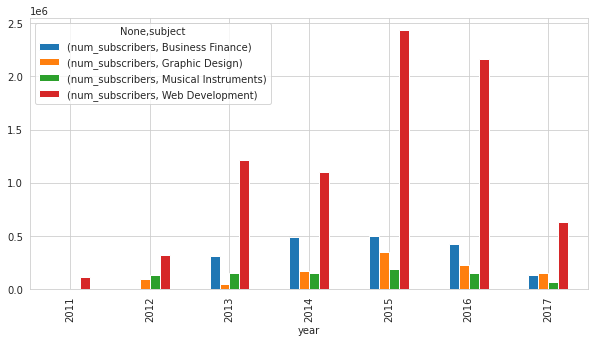

In [33]:
table3.plot(kind='bar',figsize=(10,5))

In [34]:
table4 = pd.pivot_table(train, values=['num_lectures'], index=['year'],columns=['subject'],aggfunc=np.sum)
table4

num_lectures                                                   
subject Business Finance Graphic Design Musical Instruments Web Development
year                                                                       
2011                 NaN            NaN                 NaN           574.0
2012               159.0          335.0               515.0          1365.0
2013              2048.0          610.0              1483.0          3120.0
2014              7014.0         1837.0              5429.0          5008.0
2015             11933.0         5570.0              7280.0         17147.0
2016             11490.0         6164.0              7962.0         25238.0
2017              6111.0         4813.0              3386.0         10929.0

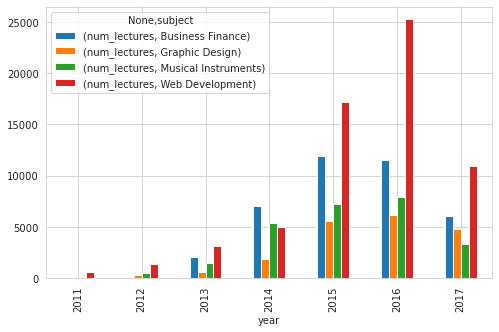

In [35]:
table4.plot(kind='bar',figsize=(8,5))

We observe that Web Development courses was the first to begin in the year of 2011 with minimum number of subcribers, it grew popularity in the year 2015 due to which udemy found it beneficial to increase the number of lectures which they did in the year of 2016. In the year 2012 they introduced two other subjects which were Graphic Design and Musical Instruments, these courses did not gain as must popularity among users, therefore the number of lectures increased at a slow pace. In 2013 Business Finance courses were introduced as they gained positive response from the users, the number of additional lectures increased moderately.

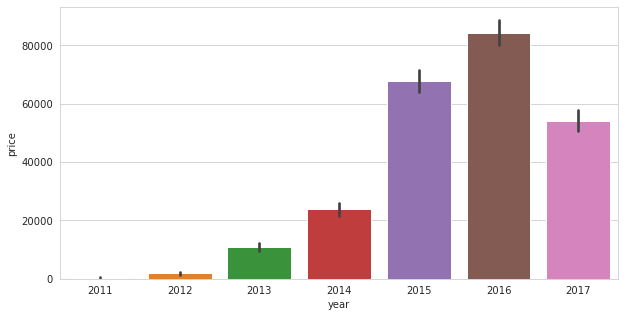

In [36]:
plt.figure(figsize=(10,5))
sns.barplot('year','price',data=train,estimator=np.sum)

# **Summary of observation**

* 	There are many users that have purchased online udemy courses.
* 	Business Finance and Web Development are the most popular subject.
* 	There are very few expert level courses among the available paid courses and none among the free courses.
* 	Users prefer those courses that cater to  ‘All Levels’ because they prove to be financially feasible as well as udemy has a wide range of such courses.
* 	 There are a maximum number of subscribers, review, lectures and duration for the paid courses. We observe an error in the duration of free courses that shows only 685.33 Hrs for 6639 lectures which is not possible.
* 	The most lectures and duration of these lectures posted belongs to Web Development – All Levels.
* 	There are a high number of posts in the year 2016 that belongs to the courses of Web Development in response to its increasing popularity.
* 	The revenue earned in the year 2016 was the highest among the 7 years.


# **Data Modeling**

For the purpose of Data Modeling we need to split our data into training and test set.Once the split is done we can put our data into various models and check each the precision of each model. We select the model with the highest precision score.

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model = train
model.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,year,engagment
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517,2015.431213,6.276448e+06
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840,1.185317,9.146977e+07
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,0.000000e+00
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000,2015.000000,6.135000e+02
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000,2016.000000,1.494900e+04
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000,2016.000000,1.512962e+05
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000,3.336873e+09


We notice that the minium number of lectures and their duration is 0 which is not possible, thus we need to eliminate that record. 

In [39]:
id = model[model['num_lectures'] == 0].index.values[0]

In [40]:
model.drop(id,axis=0,inplace=True)

In [41]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   course_id         3677 non-null   int64         
 1   course_title      3677 non-null   object        
 2   url               3677 non-null   object        
 3   is_paid           3677 non-null   bool          
 4   price             3677 non-null   int64         
 5   num_subscribers   3677 non-null   int64         
 6   num_reviews       3677 non-null   int64         
 7   num_lectures      3677 non-null   int64         
 8   level             3677 non-null   object        
 9   content_duration  3677 non-null   float64       
 10  subject           3677 non-null   object        
 11  time              3677 non-null   datetime64[ns]
 12  year              3677 non-null   int64         
 13  engagment         3677 non-null   int64         
dtypes: bool(1), datetime64[n

In the following dataset we have 1 boolean and 2 categorical features for optimum solution it is always desirable to convert these into numeric features. Also we do not need certain features such as title, url and time. Thus we drop these features.

In [42]:
model.drop(['course_title','url','time'],axis=1,inplace=True)

In [43]:
def fun(val): 
  
    if val == 0: 
        return 0
    else: 
        return 1
    
model['is_paid'] = model['is_paid'].apply(fun)

In [44]:
def lev(val): 
  
    if val == 'All Levels': 
        return 0
    elif val == 'Intermediate Level': 
        return 1
    elif val == 'Beginner Level': 
        return 2
    else:
        return 3
    
model['level'] = model['level'].apply(lev)

In [45]:
def sub(val): 
  
    if val == 'Business Finance': 
        return 0
    elif val == 'Graphic Design': 
        return 1
    elif val == 'Musical Instruments': 
        return 2
    else:
        return 3
    
model['subject'] = model['subject'].apply(sub)

In [46]:
def year(val): 
  
    if val == 2017: 
        return 6
    elif val == 2016: 
        return 5
    elif val == 2015: 
        return 4
    elif val == 2014: 
        return 3
    elif val == 2013: 
        return 2
    elif val == 2012: 
        return 1
    else:
        return 0
    
model['year'] = model['year'].apply(year)

We convert the year feature into simple values that can be used for prediction. 

In [47]:
X = model.drop(['course_id','is_paid'],axis=1)
y = model['is_paid']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# **1. Logistic Regression**

In [49]:
#Import Packages 
from sklearn.linear_model import LogisticRegression

In [50]:
#Object creation and fitting of training set
lmodel = LogisticRegression()
lmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Creation of a prediction variable
lpredictions = lmodel.predict(X_test)

In [52]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,lpredictions))

lscore = round((lmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",lscore,"%")

Confusion Matrix
[[   0   92]
 [   0 1012]]

Model Score: 91.67 %


# **2. K-Nearest Neighbour**

In [53]:
#Import Packages 
from sklearn.neighbors import KNeighborsClassifier

In [54]:
kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
#Creation of a prediction variable
kpredictions = kmodel.predict(X_test)

In [56]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,kpredictions))

kscore = round((kmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",kscore,"%")

Confusion Matrix
[[ 13  79]
 [ 46 966]]

Model Score: 88.68 %


# **3.Decision Tree**

In [57]:
#Import Packages 
from sklearn.tree import DecisionTreeClassifier

In [58]:
#Object creation and fitting of training set
dmodel = DecisionTreeClassifier()
dmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
#Creation of a prediction variable
dprediction = dmodel.predict(X_test)

In [60]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,dprediction))

dscore = round((dmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",dscore,"%")

Confusion Matrix
[[  92    0]
 [   0 1012]]

Model Score: 100.0 %


# **4.Random Forest**

In [61]:
#Import Packages 
from sklearn.ensemble import RandomForestClassifier

In [62]:
#Object creation and fitting of training set
rmodel = RandomForestClassifier(n_estimators=100)
rmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
#Creation of a prediction variable
rprediction = rmodel.predict(X_test)


In [64]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,rprediction))

rscore = round((rmodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",rscore,"%")

Confusion Matrix
[[  92    0]
 [   0 1012]]

Model Score: 100.0 %


# **5.Support Vector Machine**

In [65]:
#Import Packages 
from sklearn.svm import SVC

In [66]:
#Object creation and fitting of training set
smodel = SVC()
smodel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
#Creation of a prediction variable
sprediction = smodel.predict(X_test)

In [68]:
#Accuracy Matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,sprediction))

sscore = round((smodel.score(X_test, y_test)*100),2)
print ("\nModel Score:",sscore,"%")

Confusion Matrix
[[   0   92]
 [   1 1011]]

Model Score: 91.58 %


# **Conclusion**

In [69]:
data = [['Logistic Regression',lscore],['K-Nearest Neighbour',kscore],
        ['Decision Tree',dscore],['Random Forest',rscore],['Support Vector Machine',sscore]]
final = pd.DataFrame(data,columns=['Algorithm','Precision'],index=[1,2,3,4,5])

In [70]:
print("The results of Data Modeling are as follows:\n ")
print(final)

The results of Data Modeling are as follows:
 
                Algorithm  Precision
1     Logistic Regression      91.67
2     K-Nearest Neighbour      88.68
3           Decision Tree     100.00
4           Random Forest     100.00
5  Support Vector Machine      91.58


Among all the algorithms we notice that Decision Tree and Random Forest are of utmost precision. Therefore we can use either one of them to predict the price of the courses.